# Graph 

refs:
* https://www.freecodecamp.org/news/a-gentle-introduction-to-data-structures-how-graphs-work-a223d9ef8837/
* https://www.youtube.com/watch?v=zaBhtODEL0w
* https://cs.stackexchange.com/questions/73686/why-do-we-prefer-dfs-to-find-connected-components
* https://www.interviewcake.com/concept/python/graph?
* https://www.quora.com/Why-is-the-complexity-of-DFS-O-V+E
* https://www.quora.com/What-is-the-time-complexity-of-Breadth-First-Search-Traversal-of-a-graph
* https://adrianmejia.com/data-structures-for-beginners-graphs-time-complexity-tutorial/

Few notes and term

* **degree**: is the number of edges of a node or vertex. maximun if the maximum degree of all nodes
* **A total connected graph has $\frac{nV (nV-1)}{2}$ edges**
* High density graphs like the ones in social media: $nE >> nV$
* Low density graphs: $nV >> nE$

Python implementation with dictionary.


* Operations:

    1. Add nodes and edge 
    1. Remove nodes and edge
    
* Search

    1. contains: Check if the graph contains a value
    1. hasEdge: checks if a connection exists between two given nodes in your graph

## Notes about DFS n BFS 

**For implementatio, both search is always important to track the visited nodes to prevent infinite loop**

* Depth First Search (You go deep first)
    * implement using recursion (simple) or using stack 
    * Examples of usage
        * games like chess
        * Find connected components
        * How do you solve a maze? (Labirinto)
    * Time complexity: O(nV)
    * Space complexity recurison: worst case O(d) d is the number of nodes of the deepest branch
        *  is linear in the depth of the search 
    


Big picture 
```python 

# label node s as visited
# node s are you node t?

# no: let me ask to my neighbors start if the first neighbor
#     call dfs recursively 

# yes done 
```

* Breath first Search (you go wide first)

    * Implement using queue (Can use much more memory) 
    * Examples of usage (find short path):
        * find neighbor in peer to peer networks like bitorrent,
        * GPS find near by location
        * **find short path. shortest number of edges**
        * **Does this undirected graph have a cycle?**
        * Can this undirected graph be colored with two colors? !? Review later
    * Good
        * if the depth vary to much.
        * you are sure the graph is deeper than wider. **Wide graphs consume to much memory**
        
    
        

```python 

# queue.push(s)
# while queue is not empty
#   label node s as visited
#   node s are you node t?
#     no: 
#        1. Add all neighbors of s
#         2. remove s from the queue 

#   yes done 
```


     from: https://stackoverflow.com/questions/3332947/when-is-it-practical-to-use-depth-first-search-dfs-vs-breadth-first-search-bf

     DFS vs BFS:
     * If you know a solution is not far from the root of the tree, a breadth
       first search (BFS) might be better.
     * If the tree is very deep and solutions are rare, depth first search
       (DFS) might take an extremely long time, but BFS could be faster.
     * If the tree is very wide, a BFS might need too much memory, so it
       might be completely impractical.
     * If solutions are frequent but located deep in the tree, BFS could be
       impractical.
     * If the search tree is very deep you will need to restrict the search
       depth for depth first search (DFS), anyway (for example with iterative
       deepening).


     * DFS examples:
       * games: chess,
     * BFS examples
       * short path: find neighbor in peer to peer networks like bitorrent,
         GPS find near by location, social to find people in the same
         distance form the node


     * BFS is good for:
       * if the depth vary to much.
       * you are sure the graph is deeper than wider
     * DFS
       * can be more efficient in recursion implementation S(#h) where h is
         deepest path
       * preferable when #depth << #child




## Implementing Graph. Using dictionary

In [1]:
from typing import List

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
from collections import deque

class Graph():
    
    
    def __init__(self, graph_dict = None):
        
        if graph_dict == None:
                
            graph_dict = {}
            
        self._graph_dict = graph_dict    
        
    def add_node(self, node):
        
        self._graph_dict[node] = set()
    
    def add_edge(self, edge: tuple ):
        
        node1 = edge[0]
        node2 = edge[1]
            
        if node1 in self._graph_dict.keys() and node2 in self._graph_dict.keys():
            
            self._graph_dict[node1].add(node2)
            self._graph_dict[node2].add(node1)

    def add_edges(self, edges):
        
        for nodes in edges:
            
            self.add_edge(nodes)
        
    def get_all_edges(self, v = None):
        
        if v is not None:
            
            edges = [(v, child) for child in self._graph_dict[v] ]
            
        return edges
    
    def bfs(self, start_node):
         
        visited = [False for k in self._graph_dict.keys()]
        n_nodes = len(visited)
        
        queue = deque([start_node])
        processed = []
        while queue:
            
            node_s = queue.popleft() 
            visited[node_s] = True
            
            #print (f"node: {node_s}", end = " ")
            processed.append(node_s)
            
            for node_t in self._graph_dict[node_s]:
                
                if visited[node_t] == False:
                    
                    queue.append(node_t) 
            
        return processed

    def dfs(self, start_node):
        
        visited = [False for k in self._graph_dict.keys()]
        
        stack = ([start_node])
        processed = []
        while stack:
        
            node_s = stack.pop()
            visited[node_s] = True
            
            processed.append(node_s)
        
            for node_t in self._graph_dict[node_s]:
                
                if visited[node_t] == False:
                    
                     stack.append(node_t)
            
        return processed
    
    def _dfs(self, node_s, visited):
        
        visited[node_s] = True
                    
        for s in self._graph_dict[node_s]:
                   
            #print(f"node s: {s}")
            if visited[s] == False:
                    
                self._dfs(s, visited)

    def count_not_reach(self, node):
    
        visited = [False for k in self._graph_dict.keys()]
                        
        self._dfs(node, visited)
    
        counter = 0
        for v in visited:
            
            if v == False:
                    
                counter += 1
                
        #print(f"visited: {visited}")
        return counter
    
    def _dfs_connected_componets(self, v, cc, visited):
        
        visited[v] = True
        
        cc.append(v)
                          
        for s in self._graph_dict[v]:
                   
            #print(f"node s: {s}")
            if visited[s] == False:
                    
                self._dfs_connected_componets(s, cc, visited)

    
    def get_connected_componet(self):
        
        visited = [False for k in self._graph_dict.keys()]
        connected_component = []
        
        for v in range(len(visited)):
            
            if visited[v] == False:
                    
                cc = []
                self._dfs_connected_componets( v, cc, visited)
                #print(cc)
                connected_component.append(cc)

        return connected_component
    
    def find_path(self, v):
        
        pass

In [24]:
import networkx as nx

nx.__version__

'2.5'

{0: {1, 2}, 1: {0, 2}, 2: {0, 1}, 3: {4}, 4: {3, 5}, 5: {4}, 6: {7}, 7: {6}}
[(2, 0), (2, 1)]
 number of not connected: 5


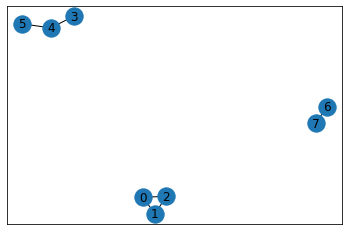

In [25]:
g = Graph()


for k in range(8):
    
    g.add_node(k)
    
edges = [ (0, 1), (0, 2), (1, 2), (3, 4), (4, 5), (6, 7) ]

# Using this library to visualize the Graph
G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G)

g.add_edges(edges)

# debug
print(g._graph_dict)

print(g.get_all_edges(2))
  
print(f" number of not connected: {g.count_not_reach(2)}") 


[0, 1, 2]
[3, 4, 5]
[6, 7]


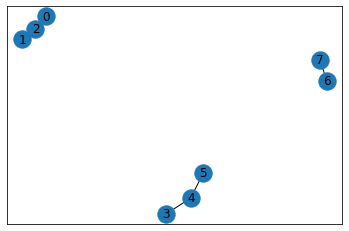

In [26]:
connected_componet = g.get_connected_componet()

for cc in connected_componet:
    
    print(f"{cc}")

nx.draw_networkx(G)

{0: {1, 3, 4}, 1: {0, 2}, 2: {1}, 3: {0}, 4: {0}}
[(0, 1), (0, 3), (0, 4)]
BFS search


[0, 1, 3, 4, 2]

DFS search


[0, 4, 3, 1, 2]

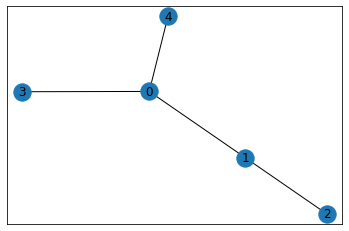

In [27]:
## testing bfs

g = Graph()

for k in range(5):
    
    g.add_node(k)
    
edges = [ (0, 1), (1, 2), (0, 3), (0, 4) ]

G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G)

g.add_edges(edges)

# debug
print(g._graph_dict)

print(g.get_all_edges(0))

print("BFS search")
queue = g.bfs(0) # Cool to understand BSF
queue

print("DFS search")
queue = g.dfs(0) # Cool to understand DSF
queue